## Como estão as fake news no Whatsapp no segundo turno das eleições 2018?

Extraí os boatos que surgiram após as eleições de primeiro turno do site [boatos.org](https://boatos.org), o dataset completo esta disponível [aqui](https://www.kaggle.com/rogeriochaves/boatos-de-whatsapp-boatosorg)

In [2]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

## Quantos boatos já foram registrados?

In [17]:
df = pd.read_csv("boatos.org.csv")

print("Total de boatos no boatos.org:", len(df))
df = df[df["timestamp"] > '2018-10-07']
print("Boatos apenas após primeiro turno:", len(df))
df.head()

Total de boatos no boatos.org: 1170
Boatos apenas após primeiro turno: 54


,Unnamed: 0,hoax,link,timestamp
0,0,“Se você enviar para apenas 20 contatos em um...,https://www.boatos.org/politica/reporter-patri...,2018-10-24 13:36:10
1,1,Mais um que fará um passeio em Curitiba. Jean...,https://www.boatos.org/politica/jean-wyllys-pe...,2018-10-24 08:46:08
2,2,Quadrilha tentou sacar cheque de R$ 68 milhõ...,https://www.boatos.org/politica/quadrilha-cheq...,2018-10-24 00:05:13
3,3,COMPARTILHEM. GENTEEEEE URGENTE. AS URNAS ESTA...,https://www.boatos.org/politica/urnas-eletroni...,2018-10-23 18:13:49
4,4,Acabou de dar agora na Odisseia FM 104.9 que a...,https://www.boatos.org/politica/brigada-milita...,2018-10-23 13:47:14


## Vamos criar uma nuvem de palavras para ver quais são as palavras mais comuns nas Fake News de WhatsApp nesse segundo turno

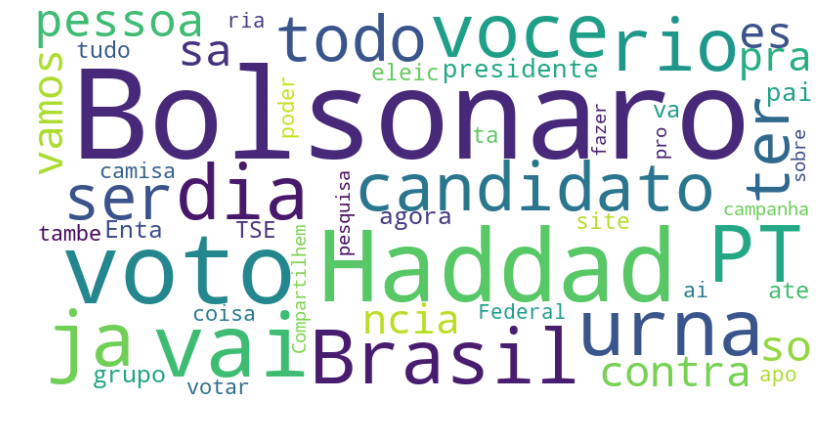

In [4]:
text = " ".join(x for x in df.hoax)

import nltk

# uncomment if you need this
# nltk.download() 

stop_words = nltk.corpus.stopwords.words('portuguese')
stopwords = set(stop_words)

plt.figure(figsize=(14,8))

# Create and generate a word cloud image:
wordcloud = WordCloud(
    stopwords=stopwords,
    max_words=50,
    background_color="white",
    width=800,
    height=400
).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

as palavras Bolsonaro e Haddad são de longe as mais presentes, porém "voto", "urna", "Brasil" e "PT" também aparecem bastante, muitas das mensagens são anti-pt e falam de fraude nas urnas

## Mas quantas vezes as palavras "Haddad" e "Bolsonaro" aparecem?

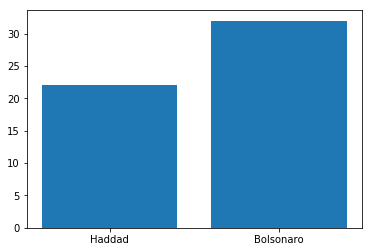

In [9]:
hoaxes_haddad = df.set_index('hoax').filter(regex='[hH]addad', axis=0)
hoaxes_bolsonaro = df.set_index('hoax').filter(regex='[bB]olsonaro', axis=0)

plt.bar([0,1], [len(hoaxes_haddad), len(hoaxes_bolsonaro)])
plt.xticks([0,1], ('Haddad', 'Bolsonaro'));

A palavra Bolsonaro aparece 32 vezes, enquanto Haddad 22, será que isso significa que tem mais fake news do lado do Bolsonaro ou do Haddad? Fica muito dificil tentar descobrir só analisando o texto, fizemos então uma classificação manual

## As fake news são mais a favor do Bolsonaro ou do Haddad?

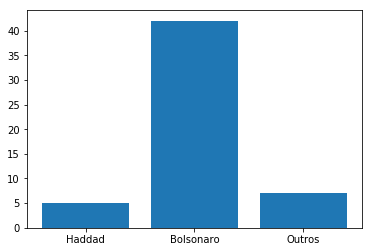

In [12]:
df = pd.read_csv("boatos_eleicoes.csv", sep=';')

hoaxes_haddad = df[df['voto'] == 13]
hoaxes_bolsonaro = df[df['voto'] == 17]
hoaxes_outros = df[df['voto'] == 0]

plt.bar([0,1,2], [len(hoaxes_haddad), len(hoaxes_bolsonaro), len(hoaxes_outros)])
plt.xticks([0,1,2], ('Haddad', 'Bolsonaro', 'Outros'));

As eleições são o tema principal dos boatos de whatsapp neste momento, sendo a maioria dos boatos a favor do candidato Jair Bolsonaro.

São 77% dos boatos a favor do Bolsonaro contra 10% a favor do Haddad.